In [2]:
import pandas as pd

df = pd.read_csv("Screentime - App Details.csv")

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Usage,Notifications,Times opened,App
0,2022-08-26,38,70,49,Instagram
1,2022-08-27,39,43,48,Instagram
2,2022-08-28,64,231,55,Instagram
3,2022-08-29,14,35,23,Instagram
4,2022-08-30,3,19,5,Instagram


In [3]:
print("Unique apps:", df['App'].unique())
print("Columns:", df.columns.tolist())


Unique apps: ['Instagram' 'Whatsapp']
Columns: ['Date', 'Usage', 'Notifications', 'Times opened', 'App']


In [5]:
# Daily usage per app
daily_usage = df.groupby(['Date', 'App'])[['Usage', 'Notifications', 'Times opened']].sum().reset_index()
daily_usage.head()


,Date,App,Usage,Notifications,Times opened
0,2022-08-26,Instagram,38,70,49
1,2022-08-26,Whatsapp,82,209,105
2,2022-08-27,Instagram,39,43,48
3,2022-08-27,Whatsapp,69,111,68
4,2022-08-28,Instagram,64,231,55


In [6]:
df['Day'] = df['Date'].dt.day_name()

# Weekly trend by app
weekly = df.groupby(['Day', 'App'])[['Usage', 'Notifications', 'Times opened']].mean().reset_index()

# Sort by weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly['Day'] = pd.Categorical(weekly['Day'], categories=weekday_order, ordered=True)
weekly = weekly.sort_values('Day')
weekly.head()


,Day,App,Usage,Notifications,Times opened
2,Monday,Instagram,43.5,41.50,44.75
3,Monday,Whatsapp,111.0,208.50,118.00
10,Tuesday,Instagram,11.0,27.25,18.50
11,Tuesday,Whatsapp,87.0,198.50,91.50
12,Wednesday,Instagram,15.0,17.50,12.25


In [8]:
# Label usage into clusters
df['Usage Cluster'] = pd.qcut(df['Usage'], q=3, labels=['Light', 'Moderate', 'Heavy'])
df[['App', 'Usage', 'Usage Cluster']].sample(10)


,App,Usage,Usage Cluster
21,Instagram,3,Light
34,Whatsapp,76,Heavy
8,Instagram,27,Light
2,Instagram,64,Moderate
50,Whatsapp,244,Heavy
27,Whatsapp,82,Heavy
6,Instagram,44,Moderate
10,Instagram,42,Moderate
25,Instagram,5,Light
18,Instagram,17,Light


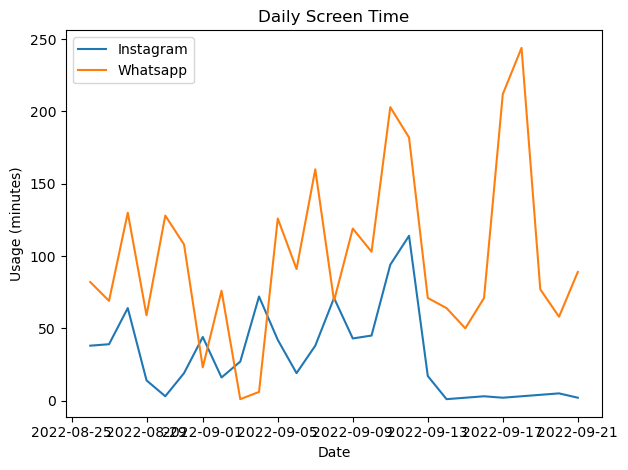

In [11]:
import matplotlib.pyplot as plt

apps = ['Instagram', 'Whatsapp']
for app in apps:
    sub = df[df['App'] == app]
    daily = sub.groupby('Date')['Usage'].sum().reset_index()
    plt.plot(daily['Date'], daily['Usage'], label=app)

plt.title("Daily Screen Time")
plt.xlabel("Date")
plt.ylabel("Usage (minutes)")
plt.legend()
plt.tight_layout()
plt.show()
